In [45]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing

# data preprocessing

In [46]:
train=pd.read_csv("/Users/bruce/Desktop/datasets/BANK/bank-additional-full.csv",sep=";")

In [47]:
train.head(5)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [48]:
train.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

In [4]:
train['y']=train['y'].map({'no':0,'yes':1})


In [5]:
train.head(30)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
5,45,services,married,basic.9y,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
6,59,admin.,married,professional.course,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
7,41,blue-collar,married,unknown,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
8,24,technician,single,professional.course,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
9,25,services,single,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0


In [6]:
print("There are " + str(train.y[train['y']==0].count())+ " negative instances")
print("There are " + str(train.y[train['y']==1].count())+ " positive instances")

There are 36548 negative instances
There are 4640 positive instances


In [42]:
def countplots(dataset):
    dataset["y"] = pd.Categorical(dataset["y"])
    sns.countplot(x="y", data=dataset)
    plt.xlabel("result")
    plt.show()

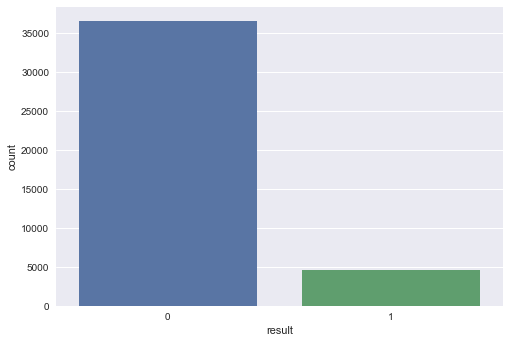

In [43]:
countplots(train)

In [7]:
values = ["illiterate", "basic.4y", "basic.6y", "basic.9y", 
    "high.school",  "professional.course", "university.degree"]
levels = range(1,len(values)+1)
dict_levels = dict(zip(values, levels))
for v in values:
    train.loc[train['education'] == v, 'education'] = dict_levels[v]

In [8]:
numeric_attrs = ['age', 'duration', 'campaign', 'pdays', 'previous',
                     'emp.var.rate', 'cons.price.idx', 'cons.conf.idx',
                     'euribor3m', 'nr.employed',]
bin_attrs = ['default', 'housing', 'loan']
cate_attrs = ['poutcome', 'education', 'job', 'marital', 
                  'contact', 'month','day_of_week']

In [9]:
for i in numeric_attrs: 
    scaler = preprocessing.StandardScaler()
    train[i] = scaler.fit_transform(train[i])

/Users/bruce/anaconda/lib/python2.7/site-packages/sklearn/utils/validation.py:429: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, _DataConversionWarning)
/Users/bruce/anaconda/lib/python2.7/site-packages/sklearn/preprocessing/data.py:586: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)
/Users/bruce/anaconda/lib/python2.7/site-packages/sklearn/preprocessing/data.py:649: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)
/Users/bruce/anaconda

In [10]:
for i in bin_attrs:
    train.loc[train[i] == 'no', i] = 0
    train.loc[train[i] == 'yes', i] = 1

In [11]:
cate_attrs.remove('education')
for i in cate_attrs:
    dummies_df = pd.get_dummies(train[i])
    dummies_df = dummies_df.rename(columns=lambda x: i+'_'+str(x))
    train = pd.concat([train,dummies_df],axis=1)
    train = train.drop(i, axis=1)

In [12]:
def train_predict_unknown(trainX, trainY, testX):
    forest = RandomForestClassifier(n_estimators=100)
    forest = forest.fit(trainX, trainY)
    test_predictY = forest.predict(testX).astype(int)
    return pd.DataFrame(test_predictY,index=testX.index)

In [13]:
from sklearn.ensemble import RandomForestRegressor,RandomForestClassifier
fill_attrs = ['education', 'default', 'housing', 'loan']
for i in fill_attrs:     
    test_data = train[train[i] == 'unknown']
    testX = test_data.drop(fill_attrs, axis=1)
    train_data = train[train[i] != 'unknown']        
    trainY = list(train_data[i].values)
    trainX = train_data.drop(fill_attrs, axis=1)    
    test_data[i] = train_predict_unknown(trainX, trainY, testX)
    train = pd.concat([train_data, test_data])

/Users/bruce/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [14]:
train.head(50)

,age,education,default,housing,loan,duration,campaign,pdays,previous,emp.var.rate,...,month_mar,month_may,month_nov,month_oct,month_sep,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed
0,1.533034,2,0,0,0,0.010471,-0.565922,0.195414,-0.349494,0.648092,...,0,1,0,0,0,0,1,0,0,0
2,-0.290186,5,0,1,0,-0.124520,-0.565922,0.195414,-0.349494,0.648092,...,0,1,0,0,0,0,1,0,0,0
3,-0.002309,3,0,0,0,-0.413787,-0.565922,0.195414,-0.349494,0.648092,...,0,1,0,0,0,0,1,0,0,0
4,1.533034,5,0,0,1,0.187888,-0.565922,0.195414,-0.349494,0.648092,...,0,1,0,0,0,0,1,0,0,0
6,1.820911,6,0,0,0,-0.460069,-0.565922,0.195414,-0.349494,0.648092,...,0,1,0,0,0,0,1,0,0,0
8,-1.537652,6,0,1,0,0.469442,-0.565922,0.195414,-0.349494,0.648092,...,0,1,0,0,0,0,1,0,0,0
9,-1.441693,5,0,1,0,-0.803333,-0.565922,0.195414,-0.349494,0.648092,...,0,1,0,0,0,0,1,0,0,0
11,-1.441693,5,0,1,0,-0.139947,-0.565922,0.195414,-0.349494,0.648092,...,0,1,0,0,0,0,1,0,0,0
12,-1.057857,5,0,0,1,-0.467783,-0.565922,0.195414,-0.349494,0.648092,...,0,1,0,0,0,0,1,0,0,0
13,1.628993,2,0,1,0,0.133892,-0.565922,0.195414,-0.349494,0.648092,...,0,1,0,0,0,0,1,0,0,0


In [15]:
features=train.drop("y",axis=1)
outcomes=train["y"].values
features.head(5)



,age,education,default,housing,loan,duration,campaign,pdays,previous,emp.var.rate,...,month_mar,month_may,month_nov,month_oct,month_sep,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed
0,1.533034,2,0,0,0,0.010471,-0.565922,0.195414,-0.349494,0.648092,...,0,1,0,0,0,0,1,0,0,0
2,-0.290186,5,0,1,0,-0.124520,-0.565922,0.195414,-0.349494,0.648092,...,0,1,0,0,0,0,1,0,0,0
3,-0.002309,3,0,0,0,-0.413787,-0.565922,0.195414,-0.349494,0.648092,...,0,1,0,0,0,0,1,0,0,0
4,1.533034,5,0,0,1,0.187888,-0.565922,0.195414,-0.349494,0.648092,...,0,1,0,0,0,0,1,0,0,0
6,1.820911,6,0,0,0,-0.460069,-0.565922,0.195414,-0.349494,0.648092,...,0,1,0,0,0,0,1,0,0,0


In [16]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(features, outcomes, test_size=0.25, random_state=10)

In [17]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

In [18]:
def plot_pr(auc_score, precision, recall, label=None):  
    pylab.figure(num=None, figsize=(6, 5))  
    pylab.xlim([0.0, 1.0])  
    pylab.ylim([0.0, 1.0])
    pylab.xlabel('Recall')  
    pylab.ylabel('Precision')  
    pylab.title('P/R (AUC=%0.2f) / %s' % (auc_score, label))  
    pylab.fill_between(recall, precision, alpha=0.2)  
    pylab.grid(True, linestyle='-', color='0.75')  
    pylab.plot(recall, precision, lw=1)      
    pylab.show()

In [19]:
def plot_roc(auc_score, fpr, tpr, label=None):  
    pylab.figure(num=None, figsize=(6, 5))  
    pylab.xlim([0.0, 1.0])  
    pylab.ylim([0.0, 1.0])
    pylab.xlabel('False positive rate')  
    pylab.ylabel('True positive rate')  
    pylab.title('ROC (AUC=%0.2f) / %s' % (auc_score, label))  
    pylab.fill_between(fpr, tpr, alpha=0.2)  
    pylab.grid(True, linestyle='-', color='0.75')  
    pylab.plot(fpr, tpr, lw=1)      
    pylab.show()

# Random forest by Sklearn

In [20]:
model=RandomForestClassifier(n_estimators=5)
kfold = KFold(n_splits=10, random_state=0)
cv_result = cross_val_score(model,X_train,Y_train, cv = kfold,scoring = "accuracy")
results=["Ranom Forest",cv_result.mean(),cv_result.std()]

print('{:20s} {:2.2f} (+/-) {:2.2f} '.format(results[0] , results[1] * 100, results[2] * 100))

Ranom Forest         90.28 (+/-) 0.65 


In [21]:
from sklearn.model_selection import GridSearchCV
model = RandomForestClassifier()
paramaters = [
             {'n_estimators' : [100, 200, 300, 500, 1000], 
              'max_features' : ['auto','log2',None],
              'max_depth':[3,4,5],
             }                                       
             ]
grid_search = GridSearchCV(estimator = model, 
                           param_grid = paramaters,
                           scoring = 'accuracy',
                           cv = 10,
                           n_jobs = -1)
grid_search = grid_search.fit(X_train,Y_train)
best_accuracy = grid_search.best_score_ 
best_parameters = grid_search.best_params_  

print('Best accuracy : ', grid_search.best_score_)
print('Best parameters :', grid_search.best_params_  )



('Best accuracy : ', 0.91648052830921622)
('Best parameters :', {'max_features': None, 'n_estimators': 500, 'max_depth': 5})


In [18]:
from xgboost import XGBClassifier

from sklearn import metrics
from matplotlib import pylab

final_model = RandomForestClassifier(n_estimators=500,max_features=None,bootstrap=True,oob_score=True,max_depth=5)
final_model.fit(X_train.values, Y_train.astype(int))
y_pred = final_model.predict(X_test.values)


from sklearn.metrics import confusion_matrix, accuracy_score
cf = confusion_matrix(Y_test.astype(int), y_pred)
print(cf)
print(accuracy_score(Y_test.astype(int), y_pred) * 100) 

# #Update. 19Jun2017. Included classiifcation report.
from sklearn.metrics import classification_report
report = classification_report(Y_test.astype(int), y_pred)
print(report)

[[8756  376]
 [ 501  664]]
91.4829562008
             precision    recall  f1-score   support

          0       0.95      0.96      0.95      9132
          1       0.64      0.57      0.60      1165

avg / total       0.91      0.91      0.91     10297



In [26]:
final_model = RandomForestClassifier(n_estimators=500,max_features='auto',bootstrap=False,max_depth=5)
final_model.fit(X_train.values, Y_train.astype(int))


y_pred = final_model.predict(X_test.values)


from sklearn.metrics import confusion_matrix, accuracy_score
cf = confusion_matrix(Y_test.astype(int), y_pred)
print(cf)
print(accuracy_score(Y_test.astype(int), y_pred) * 100) 

# #Update. 19Jun2017. Included classiifcation report.
from sklearn.metrics import classification_report
report = classification_report(Y_test.astype(int), y_pred)
print(report)

[[9070   62]
 [ 909  256]]
90.5700689521
             precision    recall  f1-score   support

          0       0.91      0.99      0.95      9132
          1       0.81      0.22      0.35      1165

avg / total       0.90      0.91      0.88     10297



# Random Forest by Xgboost

In [20]:
from xgboost import XGBClassifier

final_model = XGBClassifier(n_estimators=100,num_boost_round=1,max_depth=5,subsample=0.632,colsample_bytree=0.4)
final_model.fit(X_train.values, Y_train.astype(int))
y_pred = final_model.predict(X_test.values)


from sklearn.metrics import confusion_matrix, accuracy_score
cf = confusion_matrix(Y_test.astype(int), y_pred)
print(cf)
print(accuracy_score(Y_test.astype(int), y_pred) * 100) 

# #Update. 19Jun2017. Included classiifcation report.
from sklearn.metrics import classification_report
report = classification_report(Y_test.astype(int), y_pred)
print(report)

from sklearn.metrics import roc_curve, auc
false_positive_rate1, true_positive_rate1, thresholds = roc_curve(Y_test, y_pred)
roc_auc1 = auc(false_positive_rate1, true_positive_rate1)
print(roc_auc1)



[[8832  300]
 [ 531  634]]
91.9296882587
             precision    recall  f1-score   support

          0       0.94      0.97      0.96      9132
          1       0.68      0.54      0.60      1165

avg / total       0.91      0.92      0.92     10297

0.755677248707


# Decison tree by xgboost

In [21]:
final_model = XGBClassifier(n_estimators=1,num_boost_round=1,max_depth=5,subsample=1,colsample_bytree=1)
final_model.fit(X_train.values, Y_train.astype(int))
y_pred = final_model.predict(X_test.values)


from sklearn.metrics import confusion_matrix, accuracy_score
cf = confusion_matrix(Y_test.astype(int), y_pred)
print(cf)
print(accuracy_score(Y_test.astype(int), y_pred) * 100) 

# #Update. 19Jun2017. Included classiifcation report.
from sklearn.metrics import classification_report
report = classification_report(Y_test.astype(int), y_pred)
print(report)

from sklearn.metrics import roc_curve, auc
false_positive_rate2, true_positive_rate2, thresholds = roc_curve(Y_test, y_pred)
roc_auc2 = auc(false_positive_rate2, true_positive_rate2)
print(roc_auc2)





[[8739  393]
 [ 506  659]]
91.2693017384
             precision    recall  f1-score   support

          0       0.95      0.96      0.95      9132
          1       0.63      0.57      0.59      1165

avg / total       0.91      0.91      0.91     10297

0.76131487821


# bagged decision tree by Xgboost

In [22]:
final_model = XGBClassifier(n_estimators=100,num_boost_round=1,max_depth=5,subsample=0.632,colsample_bytree=1)
final_model.fit(X_train.values, Y_train.astype(int))
y_pred = final_model.predict(X_test.values)


from sklearn.metrics import confusion_matrix, accuracy_score
cf = confusion_matrix(Y_test.astype(int), y_pred)
print(cf)
print(accuracy_score(Y_test.astype(int), y_pred) * 100) 

# #Update. 19Jun2017. Included classiifcation report.
from sklearn.metrics import classification_report
report = classification_report(Y_test.astype(int), y_pred)
print(report)

from sklearn.metrics import roc_curve, auc
false_positive_rate3, true_positive_rate3, thresholds = roc_curve(Y_test, y_pred)
roc_auc3 = auc(false_positive_rate3, true_positive_rate3)
print(roc_auc3)


[[8795  337]
 [ 508  657]]
91.7937263281
             precision    recall  f1-score   support

          0       0.95      0.96      0.95      9132
          1       0.66      0.56      0.61      1165

avg / total       0.91      0.92      0.92     10297

0.763522650153


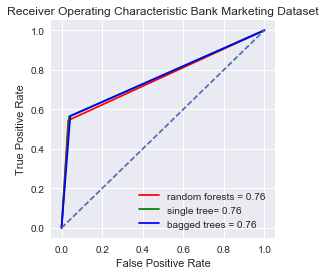

In [25]:
import matplotlib.pyplot as plt
plt.figure(figsize=(4,4))
plt.title('Receiver Operating Characteristic Bank Marketing Dataset')
plt.plot(false_positive_rate1,true_positive_rate1, color='red',label = 'random forests = %0.2f' % roc_auc1)
plt.plot(false_positive_rate3,true_positive_rate3, color='green',label = 'single tree= %0.2f' % roc_auc3)
plt.plot(false_positive_rate2,true_positive_rate2, color='blue',label = 'bagged trees = %0.2f' % roc_auc2)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],linestyle='--')
plt.axis('tight')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [32]:
from keras.models import Sequential
from keras.callbacks import EarlyStopping, ModelCheckpoint,History
from keras.layers import Dense, Activation, Dropout,Input
from keras import optimizers
history=History()

# Standard feedforward neura network

In [22]:
m = Sequential()
m.add(Dense(1280, activation='sigmoid', input_shape=(X_train.shape[1],)))
m.add(Dropout(0.5))
m.add(Dense(128, activation='sigmoid'))
m.add(Dropout(0.5))
m.add(Dense(128, activation='sigmoid'))
m.add(Dropout(0.5))
m.add(Dense(len(np.unique(Y_train)), activation='softmax'))
    
m.compile(
    optimizer=optimizers.Adam(lr=0.001),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

In [23]:
hist=m.fit(
    # Feature matrix
    X_train.values, 
    # Target class one-hot-encoded
    pd.get_dummies(pd.DataFrame(Y_train), columns=[0]).as_matrix(),
    # Iterations to be run if not stopped by EarlyStopping
    epochs=200, 
    callbacks=[
        # Stop iterations when validation loss has not improved
        EarlyStopping(monitor='val_loss', patience=25),
        # Nice for keeping the last model before overfitting occurs
        History(),
        ModelCheckpoint(
            'best.model', 
            monitor='val_loss',
            save_best_only=True,
            verbose=1
        )
    ],
    verbose=2,
    validation_split=0.1,
    batch_size=256, 
)

Train on 27801 samples, validate on 3090 samples
Epoch 1/200
Epoch 00000: val_loss improved from inf to 0.24307, saving model to best.model
2s - loss: 0.3757 - acc: 0.8785 - val_loss: 0.2431 - val_acc: 0.8990
Epoch 2/200
Epoch 00001: val_loss improved from 0.24307 to 0.18144, saving model to best.model
2s - loss: 0.2457 - acc: 0.8948 - val_loss: 0.1814 - val_acc: 0.9191
Epoch 3/200
Epoch 00002: val_loss improved from 0.18144 to 0.17381, saving model to best.model
2s - loss: 0.2172 - acc: 0.8997 - val_loss: 0.1738 - val_acc: 0.9181
Epoch 4/200
Epoch 00003: val_loss improved from 0.17381 to 0.17143, saving model to best.model
2s - loss: 0.2057 - acc: 0.9037 - val_loss: 0.1714 - val_acc: 0.9197
Epoch 5/200
Epoch 00004: val_loss did not improve
2s - loss: 0.2054 - acc: 0.9045 - val_loss: 0.1731 - val_acc: 0.9191
Epoch 6/200
Epoch 00005: val_loss improved from 0.17143 to 0.17058, saving model to best.model
2s - loss: 0.2031 - acc: 0.9051 - val_loss: 0.1706 - val_acc: 0.9220
Epoch 7/200
Epoc

In [24]:
m.load_weights("best.model")

In [25]:
mapping = (
    pd.get_dummies(pd.DataFrame(Y_train), columns=[0], prefix='', prefix_sep='')
    .columns.astype(int).values
)
y_pred_nn = [mapping[pred] for pred in m.predict(X_test.values).argmax(axis=1)]

In [26]:
from sklearn.metrics import confusion_matrix, accuracy_score
cf = confusion_matrix(Y_test.astype(int), y_pred_nn)
print(cf)
print(accuracy_score(Y_test.astype(int), y_pred_nn) * 100) 

# #Update. 19Jun2017. Included classiifcation report.
from sklearn.metrics import classification_report
report = classification_report(Y_test.astype(int), y_pred_nn)
print(report)

[[8797  335]
 [ 591  574]]
91.0070894435
             precision    recall  f1-score   support

          0       0.94      0.96      0.95      9132
          1       0.63      0.49      0.55      1165

avg / total       0.90      0.91      0.91     10297



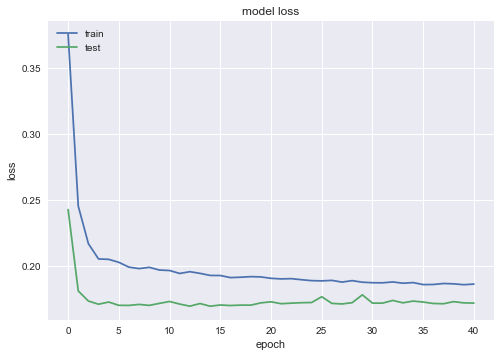

In [27]:
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [28]:
train.columns

Index([u'age', u'education', u'default', u'housing', u'loan', u'duration',
       u'campaign', u'pdays', u'previous', u'emp.var.rate', u'cons.price.idx',
       u'cons.conf.idx', u'euribor3m', u'nr.employed', u'y',
       u'poutcome_failure', u'poutcome_nonexistent', u'poutcome_success',
       u'job_admin.', u'job_blue-collar', u'job_entrepreneur',
       u'job_housemaid', u'job_management', u'job_retired',
       u'job_self-employed', u'job_services', u'job_student',
       u'job_technician', u'job_unemployed', u'job_unknown',
       u'marital_divorced', u'marital_married', u'marital_single',
       u'marital_unknown', u'contact_cellular', u'contact_telephone',
       u'month_apr', u'month_aug', u'month_dec', u'month_jul', u'month_jun',
       u'month_mar', u'month_may', u'month_nov', u'month_oct', u'month_sep',
       u'day_of_week_fri', u'day_of_week_mon', u'day_of_week_thu',
       u'day_of_week_tue', u'day_of_week_wed'],
      dtype='object')

In [29]:
len(train.columns)

51

# New deep learning model

In [38]:
from keras.callbacks import EarlyStopping, ModelCheckpoint,History
from keras.models import Model
import keras
history = History()


input_1 = Input(shape=(1,))
input_2 = Input(shape=(1,))
input_3 = Input(shape=(1,))
input_4 = Input(shape=(1,))
input_5 = Input(shape=(1,))
input_6 = Input(shape=(1,))
input_7 = Input(shape=(1,))
input_8 = Input(shape=(1,))
input_9 = Input(shape=(1,))
input_10 = Input(shape=(1,))
input_11= Input(shape=(1,))
input_12= Input(shape=(1,))
input_13= Input(shape=(1,))
input_14= Input(shape=(1,))
input_15= Input(shape=(1,))
input_16= Input(shape=(1,))

input_17= Input(shape=(1,))
input_18= Input(shape=(1,))
input_19= Input(shape=(1,))
input_20= Input(shape=(1,))
input_21= Input(shape=(1,))
input_22 = Input(shape=(1,))
input_23= Input(shape=(1,))
input_24= Input(shape=(1,))

input_25= Input(shape=(1,))
input_26= Input(shape=(1,))
input_27= Input(shape=(1,))
input_28= Input(shape=(1,))
input_29= Input(shape=(1,))
input_30= Input(shape=(1,))
input_31= Input(shape=(1,))
input_32= Input(shape=(1,))

input_33= Input(shape=(1,))
input_34= Input(shape=(1,))
input_35= Input(shape=(1,))
input_36= Input(shape=(1,))
input_37= Input(shape=(1,))
input_38= Input(shape=(1,))
input_39 = Input(shape=(1,))
input_40= Input(shape=(1,))

input_41 = Input(shape=(1,))
input_42 = Input(shape=(1,))
input_43 = Input(shape=(1,))
input_44 = Input(shape=(1,))
input_45 = Input(shape=(1,))
input_46 = Input(shape=(1,))
input_47 = Input(shape=(1,))
input_48 = Input(shape=(1,))
input_49 = Input(shape=(1,))
input_50 = Input(shape=(1,))








hidden_1 = Dense(32, activation='sigmoid')(input_1)
hidden_2 = Dense(32, activation='sigmoid')(input_2)
hidden_3 = Dense(32, activation='sigmoid')(input_3)
hidden_4 = Dense(32, activation='sigmoid')(input_4)
hidden_5 = Dense(32, activation='sigmoid')(input_5)
hidden_6 = Dense(32, activation='sigmoid')(input_6)
hidden_7 = Dense(32, activation='sigmoid')(input_7)
hidden_8 = Dense(32, activation='sigmoid')(input_8)
hidden_9 = Dense(32, activation='sigmoid')(input_9)
hidden_10 = Dense(32, activation='sigmoid')(input_10)
hidden_11= Dense(32, activation='sigmoid')(input_11)
hidden_12 = Dense(32, activation='sigmoid')(input_12)
hidden_13 = Dense(32, activation='sigmoid')(input_13)
hidden_14 = Dense(32, activation='sigmoid')(input_14)
hidden_15 = Dense(32, activation='sigmoid')(input_15)
hidden_16 = Dense(32, activation='sigmoid')(input_16)
hidden_17 = Dense(32, activation='sigmoid')(input_17)
hidden_18 = Dense(32, activation='sigmoid')(input_18)
hidden_19 = Dense(32, activation='sigmoid')(input_19)
hidden_20 = Dense(32, activation='sigmoid')(input_20)

hidden_21 = Dense(32, activation='sigmoid')(input_21)
hidden_22 = Dense(32, activation='sigmoid')(input_22)
hidden_23 = Dense(32, activation='sigmoid')(input_23)
hidden_24 = Dense(32, activation='sigmoid')(input_24)
hidden_25 = Dense(32, activation='sigmoid')(input_25)
hidden_26 = Dense(32, activation='sigmoid')(input_26)
hidden_27 = Dense(32, activation='sigmoid')(input_27)
hidden_28 = Dense(32, activation='sigmoid')(input_28)
hidden_29 = Dense(32, activation='sigmoid')(input_29)
hidden_30 = Dense(32, activation='sigmoid')(input_30)
hidden_31 = Dense(32, activation='sigmoid')(input_31)
hidden_32 = Dense(32, activation='sigmoid')(input_32)
hidden_33 = Dense(32, activation='sigmoid')(input_33)
hidden_34 = Dense(32, activation='sigmoid')(input_34)
hidden_35 = Dense(32, activation='sigmoid')(input_35)
hidden_36 = Dense(32, activation='sigmoid')(input_36)
hidden_37 = Dense(32, activation='sigmoid')(input_37)
hidden_38 = Dense(32, activation='sigmoid')(input_38)
hidden_39 = Dense(32, activation='sigmoid')(input_39)
hidden_40 = Dense(32, activation='sigmoid')(input_40)
hidden_41 = Dense(32, activation='sigmoid')(input_41)
hidden_42 = Dense(32, activation='sigmoid')(input_42)
hidden_43 = Dense(32, activation='sigmoid')(input_43)
hidden_44 = Dense(32, activation='sigmoid')(input_44)
hidden_45 = Dense(32, activation='sigmoid')(input_45)
hidden_46 = Dense(32, activation='sigmoid')(input_46)
hidden_47 = Dense(32, activation='sigmoid')(input_47)
hidden_48 = Dense(32, activation='sigmoid')(input_48)
hidden_49 = Dense(32, activation='sigmoid')(input_49)
hidden_50 = Dense(32, activation='sigmoid')(input_50)




value_list=[X_train[['age']].values,
            X_train[['education']].values,
            X_train[['default']].values,
            X_train[['housing']].values,
            X_train[['loan']].values,
            X_train[['duration']].values,
            X_train[['campaign']].values,
            X_train[['pdays']].values,
            X_train[['previous']].values,
            X_train[['emp.var.rate']].values,
            X_train[['cons.price.idx']].values,
            X_train[['cons.conf.idx']].values,
            X_train[['euribor3m']].values,
            X_train[['nr.employed']].values,
            X_train[['poutcome_failure']].values,
            X_train[['poutcome_nonexistent']].values,
            X_train[['poutcome_success']].values,
            X_train[['job_admin.']].values,
            X_train[['job_blue-collar']].values,
            X_train[['job_entrepreneur']].values,
            X_train[['job_housemaid']].values,
            X_train[['job_management']].values,
            X_train[['job_retired']].values,
            X_train[['job_self-employed']].values,
            X_train[['job_student']].values,
            X_train[['job_technician']].values,
            X_train[['job_services']].values,
            X_train[['job_unemployed']].values,
            X_train[['job_unknown']].values,
            X_train[['contact_cellular']].values,
            X_train[['marital_divorced']].values,
            X_train[['marital_single']].values,
            X_train[['marital_married']].values,
            X_train[['marital_unknown']].values,
            X_train[['contact_telephone']].values,
            X_train[['month_apr']].values,
            X_train[['month_aug']].values,
            X_train[['month_jul']].values,
            X_train[['month_dec']].values,
            X_train[['month_jun']].values,
            X_train[['month_mar']].values,
            X_train[['month_may']].values,
            X_train[['month_nov']].values,
            X_train[['month_oct']].values,
            X_train[['month_sep']].values,
            X_train[['day_of_week_fri']].values,
            X_train[['day_of_week_mon']].values,
            X_train[['day_of_week_thu']].values,
            X_train[['day_of_week_tue']].values,
            X_train[['day_of_week_wed']].values
           ]

value_list_test=[X_test[['age']].values,
            X_test[['education']].values,
            X_test[['default']].values,
            X_test[['housing']].values,
            X_test[['loan']].values,
            X_test[['duration']].values,
            X_test[['campaign']].values,
            X_test[['pdays']].values,
            X_test[['previous']].values,
            X_test[['emp.var.rate']].values,
            X_test[['cons.price.idx']].values,
            X_test[['cons.conf.idx']].values,
            X_test[['euribor3m']].values,
            X_test[['nr.employed']].values,
            X_test[['poutcome_failure']].values,
            X_test[['poutcome_nonexistent']].values,
            X_test[['poutcome_success']].values,
            X_test[['job_admin.']].values,
            X_test[['job_blue-collar']].values,
            X_test[['job_entrepreneur']].values,
            X_test[['job_housemaid']].values,
            X_test[['job_management']].values,
            X_test[['job_retired']].values,
            X_test[['job_self-employed']].values,
            X_test[['job_student']].values,
            X_test[['job_technician']].values,
            X_test[['job_services']].values,
            X_test[['job_unemployed']].values,
            X_test[['job_unknown']].values,
            X_test[['contact_cellular']].values,
            X_test[['marital_divorced']].values,
            X_test[['marital_single']].values,
            X_test[['marital_married']].values,
            X_test[['marital_unknown']].values,
            X_test[['contact_telephone']].values,
            X_test[['month_apr']].values,
            X_test[['month_aug']].values,
            X_test[['month_jul']].values,
            X_test[['month_dec']].values,
            X_test[['month_jun']].values,
            X_test[['month_mar']].values,
            X_test[['month_may']].values,
            X_test[['month_nov']].values,
            X_test[['month_oct']].values,
            X_test[['month_sep']].values,
            X_test[['day_of_week_fri']].values,
            X_test[['day_of_week_mon']].values,
            X_test[['day_of_week_thu']].values,
            X_test[['day_of_week_tue']].values,
            X_test[['day_of_week_wed']].values
           ]

x = keras.layers.concatenate([hidden_1,hidden_2,hidden_3,hidden_4,hidden_5,hidden_6,hidden_7,hidden_8,
                             hidden_9,hidden_10,hidden_11,hidden_12,hidden_13,hidden_14,hidden_15,hidden_16,
                             hidden_17,hidden_18,hidden_19,hidden_20,hidden_21,hidden_22,hidden_23,hidden_24,
                             hidden_25,hidden_26,hidden_27,hidden_28,hidden_29,hidden_30,hidden_31,hidden_32,
                             hidden_33,hidden_34,hidden_35,hidden_36,hidden_37,hidden_38,hidden_39,hidden_40,
                             hidden_41,hidden_42,hidden_43,hidden_44,hidden_45,hidden_46,hidden_47,hidden_48,
                             hidden_49,hidden_50])

x = Dense(96, activation='sigmoid')(x)
output = Dense(len(np.unique(Y_train)), activation='softmax')(x)

model = Model(inputs=[input_1,input_2,input_3,input_4,input_5,input_6,input_7,input_8,
                     input_9,input_10,input_11,input_12,input_13,input_14,input_15,input_16,
                     input_17,input_18,input_19,input_20,input_21,input_22,input_23,input_24,
                     input_25,input_26,input_27,input_28,input_29,input_30,input_31,input_32,
                     input_33,input_34,input_35,input_36,input_37,input_38,input_39,input_40,
                     input_41,input_42,input_43,input_44,input_45,input_46,input_47,input_48,
                     input_49,input_50], outputs=[output])
model.compile(
    optimizer=optimizers.Adam(lr=0.001),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

hist=model.fit(
    # Feature matrix
    value_list, 
    # Target class one-hot-encoded
    pd.get_dummies(pd.DataFrame(Y_train), columns=[0]).as_matrix(),
    # Iterations to be run if not stopped by EarlyStopping
    epochs=200, 
    callbacks=[
        # Stop iterations when validation loss has not improved
        EarlyStopping(monitor='val_loss', patience=25),
        history,
        # Nice for keeping the last model before overfitting occurs
        ModelCheckpoint(
            'best.model', 
            monitor='val_loss',
            save_best_only=True,
            verbose=1
        )
    ],
    verbose=2,
    validation_split=0.1,
    batch_size=32, 
)

Train on 27801 samples, validate on 3090 samples
Epoch 1/200
Epoch 00000: val_loss improved from inf to 0.18434, saving model to best.model
6s - loss: 0.2661 - acc: 0.8959 - val_loss: 0.1843 - val_acc: 0.9204
Epoch 2/200
Epoch 00001: val_loss improved from 0.18434 to 0.17314, saving model to best.model
6s - loss: 0.2076 - acc: 0.9067 - val_loss: 0.1731 - val_acc: 0.9217
Epoch 3/200
Epoch 00002: val_loss improved from 0.17314 to 0.17206, saving model to best.model
6s - loss: 0.2016 - acc: 0.9080 - val_loss: 0.1721 - val_acc: 0.9159
Epoch 4/200
Epoch 00003: val_loss did not improve
6s - loss: 0.2008 - acc: 0.9069 - val_loss: 0.1752 - val_acc: 0.9094
Epoch 5/200
Epoch 00004: val_loss did not improve
6s - loss: 0.1989 - acc: 0.9074 - val_loss: 0.1763 - val_acc: 0.9133
Epoch 6/200
Epoch 00005: val_loss did not improve
6s - loss: 0.1991 - acc: 0.9067 - val_loss: 0.1742 - val_acc: 0.9152
Epoch 7/200
Epoch 00006: val_loss did not improve
6s - loss: 0.1967 - acc: 0.9083 - val_loss: 0.1764 - val

In [39]:
model.load_weights("best.model")
mapping = (
    pd.get_dummies(pd.DataFrame(Y_train), columns=[0], prefix='', prefix_sep='')
    .columns.astype(int).values
)
y_pred_nn = [mapping[pred] for pred in model.predict(value_list_test).argmax(axis=1)]

In [40]:
from sklearn.metrics import confusion_matrix, accuracy_score
cf = confusion_matrix(Y_test.astype(int), y_pred_nn)
print(cf)
print(accuracy_score(Y_test.astype(int), y_pred_nn) * 100) 

# #Update. 19Jun2017. Included classiifcation report.
from sklearn.metrics import classification_report
report = classification_report(Y_test.astype(int), y_pred_nn)
print(report)

[[8863  269]
 [ 640  525]]
91.1721860736
             precision    recall  f1-score   support

          0       0.93      0.97      0.95      9132
          1       0.66      0.45      0.54      1165

avg / total       0.90      0.91      0.90     10297



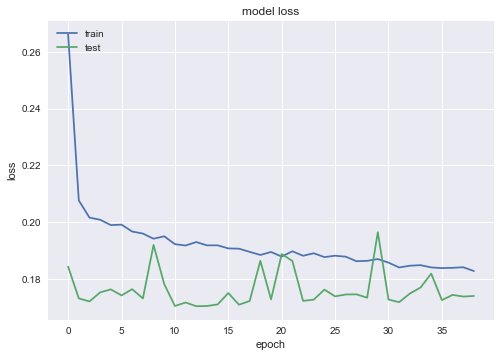

In [41]:
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [47]:
data_train,data_val=train_test_split(train,test_size=0.25, random_state=10)
X_val=data_val.drop(['y'], axis=1).values
y_val=data_val['y'].ravel()

def train_nn_simple(data_train,X_val,y_val):
    

    data_train_new=data_train.sample(frac=0.632,replace=True)
    X_train=data_train_new.drop(['y'], axis=1).values
    y_train=data_train_new['y'].ravel()
    
    m = Sequential()
    m.add(Dense(128, activation='sigmoid', input_shape=(X_train.shape[1],)))
    m.add(Dropout(0.5))
    m.add(Dense(128, activation='sigmoid'))
    m.add(Dropout(0.5))
    m.add(Dense(128, activation='sigmoid'))
    m.add(Dropout(0.5))
    m.add(Dense(len(np.unique(y_train)), activation='softmax'))
    
    m.compile(
    optimizer=optimizers.Adam(lr=0.001),
    loss='categorical_crossentropy',
    metrics=['accuracy']
    )
    
    m.fit(
    # Feature matrix
    X_train, 
    # Target class one-hot-encoded
    pd.get_dummies(pd.DataFrame(y_train), columns=[0]).as_matrix(),
    # Iterations to be run if not stopped by EarlyStopping
    epochs=200, 
    callbacks=[
        # Stop iterations when validation loss has not improved
        EarlyStopping(monitor='val_loss', patience=25),
        # Nice for keeping the last model before overfitting occurs
        ModelCheckpoint(
            'best.model', 
            monitor='val_loss',
            save_best_only=True,
            verbose=1
        )
    ],
    verbose=2,
    validation_split=0.2,
    batch_size=256, 
    )
    m.load_weights("best.model")
    mapping = (
    pd.get_dummies(pd.DataFrame(y_train), columns=[0], prefix='', prefix_sep='')
    .columns.astype(int).values
    )
    y_pred = [mapping[pred] for pred in m.predict(X_val).argmax(axis=1)]
    return y_pred

In [48]:
result=[]
for i in range(50):
    y_pred=train_nn_simple(train,X_val,y_val)
    result.append(y_pred)

Train on 20824 samples, validate on 5207 samples
Epoch 1/200
Epoch 00000: val_loss improved from inf to 0.31884, saving model to best.model
0s - loss: 0.4022 - acc: 0.8756 - val_loss: 0.3188 - val_acc: 0.8911
Epoch 2/200
Epoch 00001: val_loss improved from 0.31884 to 0.24314, saving model to best.model
0s - loss: 0.3185 - acc: 0.8864 - val_loss: 0.2431 - val_acc: 0.9024
Epoch 3/200
Epoch 00002: val_loss improved from 0.24314 to 0.20818, saving model to best.model
0s - loss: 0.2597 - acc: 0.8964 - val_loss: 0.2082 - val_acc: 0.9049
Epoch 4/200
Epoch 00003: val_loss improved from 0.20818 to 0.19932, saving model to best.model
0s - loss: 0.2320 - acc: 0.9004 - val_loss: 0.1993 - val_acc: 0.9057
Epoch 5/200
Epoch 00004: val_loss improved from 0.19932 to 0.19392, saving model to best.model
0s - loss: 0.2214 - acc: 0.9029 - val_loss: 0.1939 - val_acc: 0.9070
Epoch 6/200
Epoch 00005: val_loss improved from 0.19392 to 0.19291, saving model to best.model
0s - loss: 0.2148 - acc: 0.9039 - val_lo

In [49]:
result_new=np.array(result)
result_new

array([[1, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ..., 
       [1, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0]])

In [51]:
result_new1=result_new.sum(axis=0)
result_new1

array([16,  0,  0, ...,  0,  0,  0])

In [52]:
re=result_new1.tolist()
re

[16,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 50,
 6,
 0,
 0,
 50,
 0,
 49,
 0,
 0,
 0,
 49,
 0,
 0,
 39,
 0,
 1,
 0,
 0,
 0,
 0,
 50,
 0,
 0,
 0,
 50,
 0,
 9,
 37,
 0,
 0,
 0,
 0,
 0,
 0,
 9,
 0,
 0,
 0,
 0,
 0,
 50,
 0,
 0,
 0,
 0,
 0,
 0,
 8,
 0,
 0,
 21,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 50,
 0,
 49,
 47,
 0,
 0,
 0,
 0,
 0,
 0,
 12,
 0,
 0,
 0,
 0,
 0,
 14,
 0,
 0,
 50,
 48,
 45,
 45,
 46,
 0,
 0,
 0,
 0,
 0,
 11,
 0,
 48,
 0,
 0,
 0,
 0,
 0,
 50,
 0,
 0,
 0,
 50,
 0,
 0,
 0,
 0,
 0,
 0,
 49,
 0,
 0,
 0,
 3,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 49,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 2,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 12,
 0,
 0,
 0,
 0,
 0,
 29,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 34,
 0,
 9,
 2,
 0,
 0,
 0,
 49,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 50,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,


In [73]:
y_pred=[]
for each in re:
    if each>=25:
        y_pred.append(1)
    else:
        y_pred.append(0)

In [74]:
from sklearn.metrics import confusion_matrix, accuracy_score
cf = confusion_matrix(y_val, y_pred)
print(cf)
print(accuracy_score(y_val, y_pred) * 100) 

from sklearn.metrics import classification_report
report = classification_report(y_val, y_pred)
print(report)

[[8821  311]
 [ 532  633]]
91.813149461
             precision    recall  f1-score   support

          0       0.94      0.97      0.95      9132
          1       0.67      0.54      0.60      1165

avg / total       0.91      0.92      0.91     10297

